# Assignment 2: Data Preparation
## Madeline Kusters

## Overview

The purpose of this assignment is to familiarize you with some of the data quality operations using the Python programming language. You will be working to derive insights from real-world data by using methods commonly employed during the data quality process. You are welcome to consult additional documentation and code, so long as all references and sources are properly cited in your source code (as comments or headers). Please free to email or meet with the instructor if you run into any problems.

#### Dataset
You will be working with the thyroid dataset for this assignment. The dataset is provided in comma-separated (CSV) file format. For all rows, the last column designates the class (y) and the remaining columns designate features (X). The first row consists of the feature and class names. Publicly available datasets are commonly provided in this format. You can find more details on the dataset here at the UCI Machine Learning Repository: http://archive.ics.uci.edu/ml/datasets/Thyroid+Disease.

#### Submission
You are expected to submit a single Jupyter/IPython Notebook file for the assignment. Your code can be embedded into the notebook file as code cells, while your answers to the questions can be embedded as markdown cells. Please submit your notebook file via NotreDameX.

*NOTE: This notebook is provided only as a template for you to use for the assignment. You may customize it as you see fit.*

In [35]:
# Allow inline plotting of figures.
%matplotlib inline

# Import useful libraries.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Imputer, StandardScaler, MinMaxScaler

# Read in the file URL.
fileURL = 'https://raw.githubusercontent.com/cse44648/cse44648/master/datasets/hypothyroid.csv'


# Read the file into a DataFrame.
data = pd.read_csv(fileURL)

# Output the first few rows of the dataset.
data.head()

Age Sex On Thyroxine Query on Thyroxine On Antithyroid Medication  \
0   72   M            f                  f                         f   
1   15   F            t                  f                         f   
2   24   M            f                  f                         f   
3   24   F            f                  f                         f   
4   77   M            f                  f                         f   

  Thyroid Surgery Query Hypothyroid Query Hyperthyroid Pregnant Sick  \
0               f                 f                  f        f    f   
1               f                 f                  f        f    f   
2               f                 f                  f        f    f   
3               f                 f                  f        f    f   
4               f                 f                  f        f    f   

      ...        T3 TT4 Measured TT4 T4U Measured   T4U FTI Measured  FTI  \
0     ...       0.6            y  15            y  1.48            y   10   
1     ...       1.7            y  19            y  1.13            y   17   
2     ...       0.2            y   4            y  1.00            y    0   
3     ...       0.4            y   6            y  1.04            y    6   
4     ...       1.2            y  57            y  1.28            y   44   

  TBG Measured  TBG        Class  
0            n  NaN  hypothyroid  
1            n  NaN  hypothyroid  
2            n  NaN  hypothyroid  
3            n  NaN  hypothyroid  
4            n  NaN  hypothyroid  

[5 rows x 26 columns]

## Questions

#### 1. Standardization
Standardize the hypothyroid disease data so that the values of each continuous feature are standard normally distributed (i.e., Gaussian with zero mean and unit variance). Note that scikit-learn may be used to perform standardization (see sklearn.preprocessing.scale). Now make box plots for each class and corresponding feature. How do the plots differ from box plots made before standardization? *(4 points)*

##### Boxplots before standardization

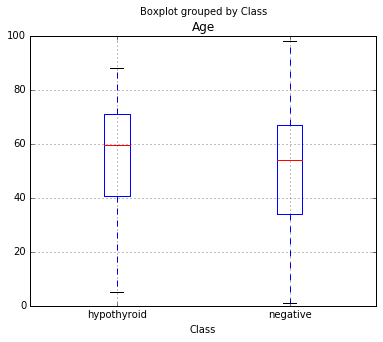

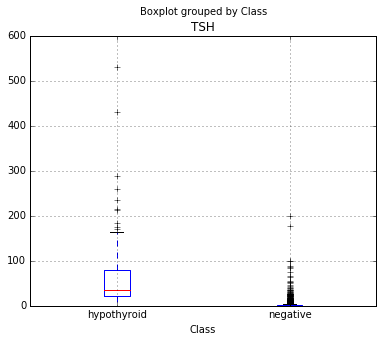

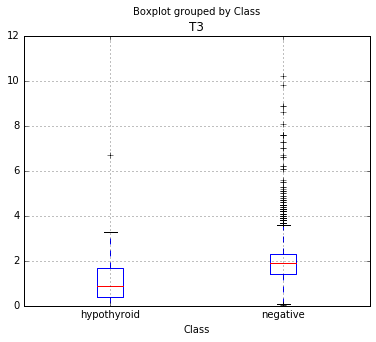

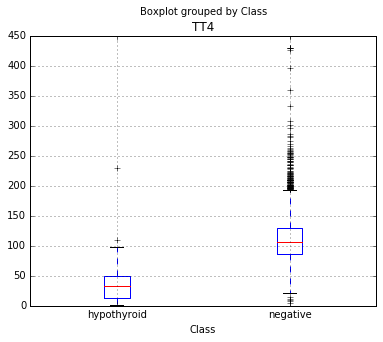

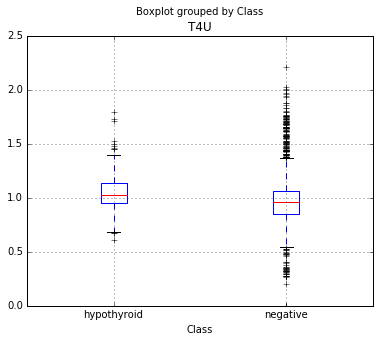

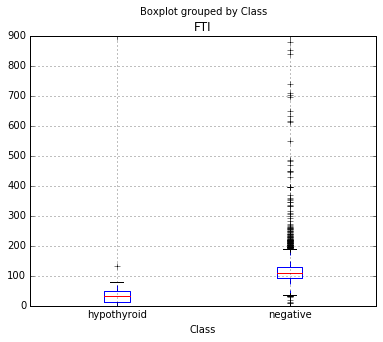

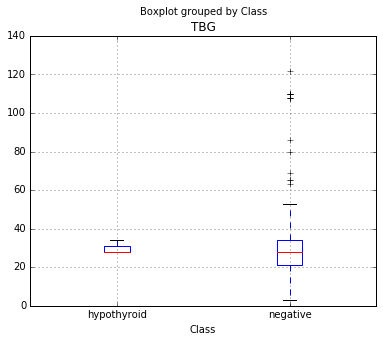

In [36]:
for feature in data._get_numeric_data():
    data.boxplot(column=feature, by='Class', figsize=(6,5))

##### Boxplots after standardization

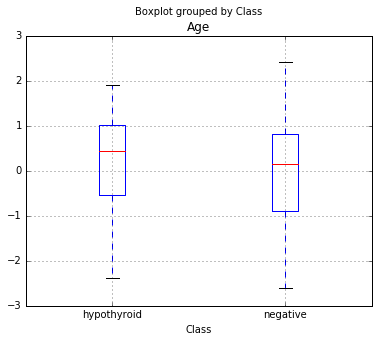

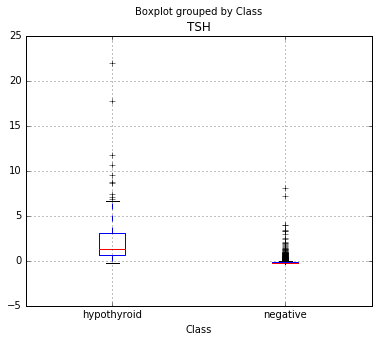

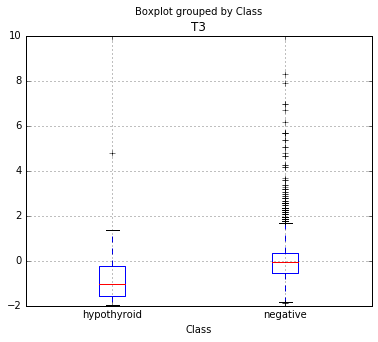

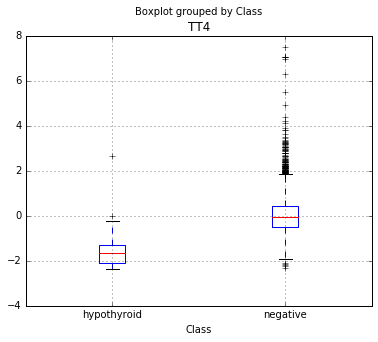

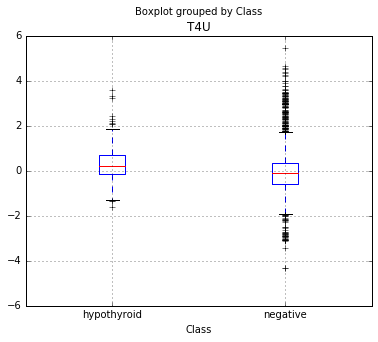

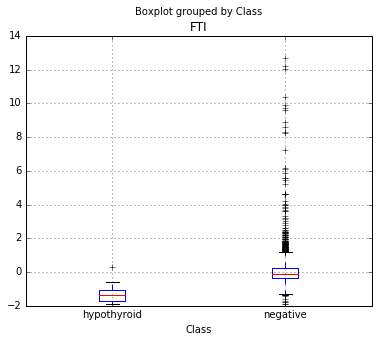

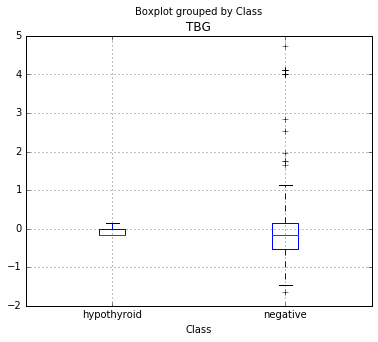

In [37]:
# standardize each continuous feature
# standard normally distributed, Gaussian with zero mean and unit variance
continuous_feature_names = ['Age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']


for name in continuous_feature_names:

    new_dataframe = data[[name, 'Class']].dropna()

    scaled_feature = sklearn.preprocessing.scale(new_dataframe[[name]])

    new_dataframe[[name]] = scaled_feature
 
    new_dataframe.boxplot(column=name, by='Class', figsize=(6,5))
    
    

The boxplots before standardization look similiar in spread and number of outliers to the plots after standardization.  The box plots after standardization are of course centered around 0, and their spreads are either stretched or compressed to accomodate a standard deviation of 1.

#### 2. Imputation
Replace the missing values for each feature in the hypothyroid disease data twice, once with both the mean value and once median value (see sklearn.preprocessing.Imputer). What similarities or differences do you observe in the imputed values from both methods? *(3 points)*

In [67]:
imp_mean = Imputer(missing_values=np.nan, strategy="mean", axis=0)
imp_median = Imputer(missing_values=np.nan, strategy="median", axis=0)

imputed_data_mean = pd.read_csv(fileURL)
imputed_data_median = pd.read_csv(fileURL)
print imputed_data_mean['Age'][26]

for name in continuous_feature_names:
    imputed_data_mean[[name]] = imp_mean.fit_transform(imputed_data_mean[[name]])
    imputed_data_median[[name]] = imp_median.fit_transform(imputed_data_median[[name]])
    
print imputed_data_mean['Age'][26]

nan
51.1542142068


Add comments here.

##### Boxplots of data imputed with the mean value

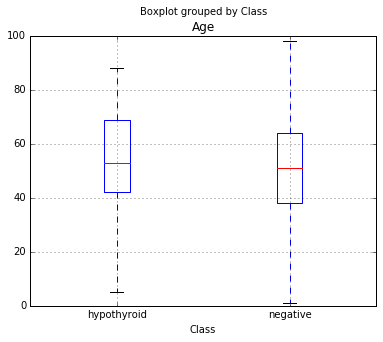

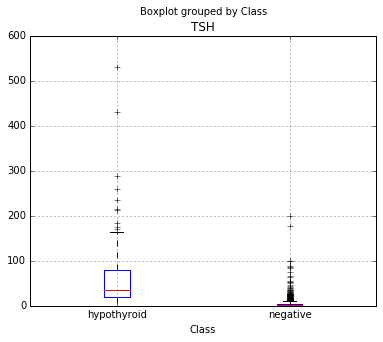

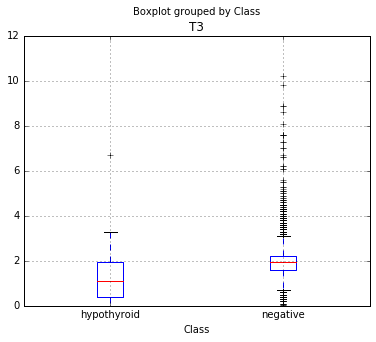

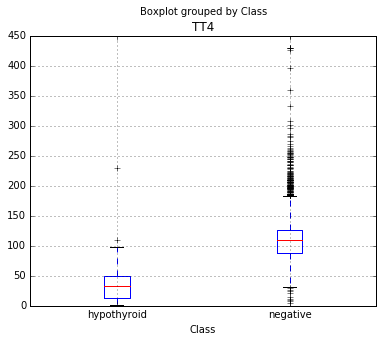

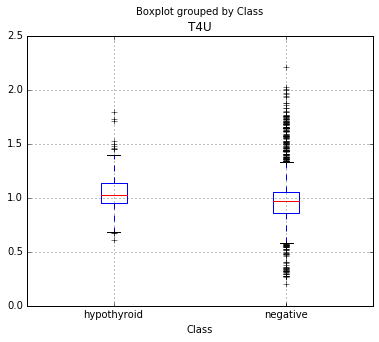

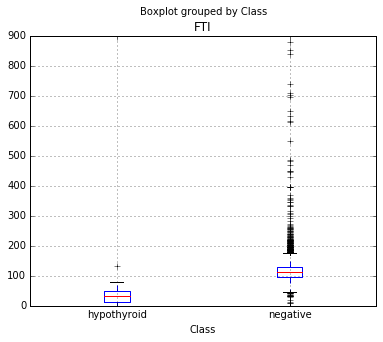

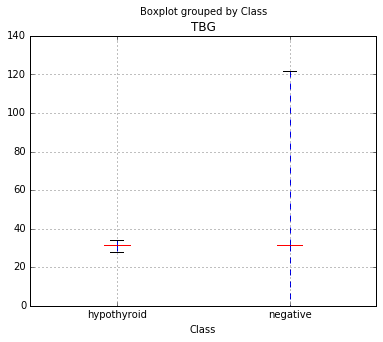

In [39]:
for feature in imputed_data_mean._get_numeric_data():
    imputed_data_mean.boxplot(column=feature, by='Class', figsize=(6,5))

##### Boxplots of data imputed with the median value

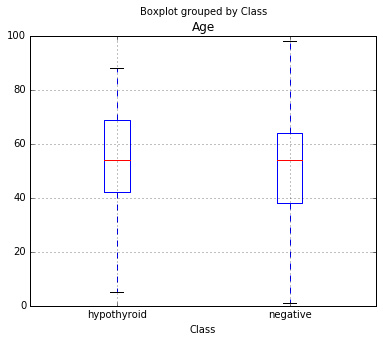

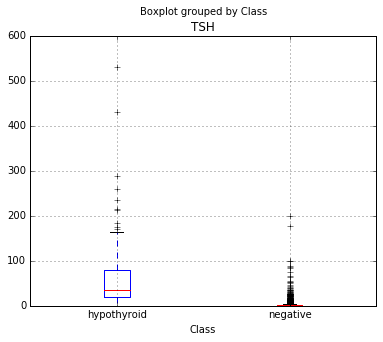

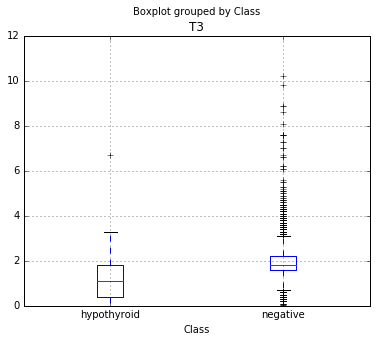

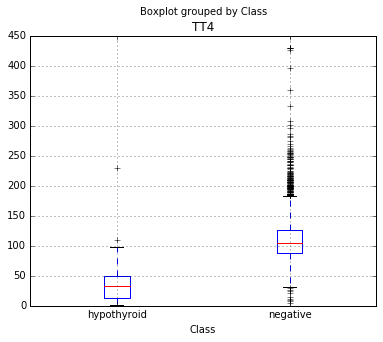

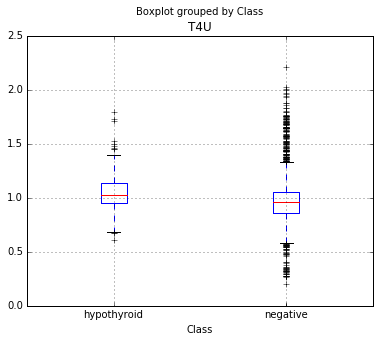

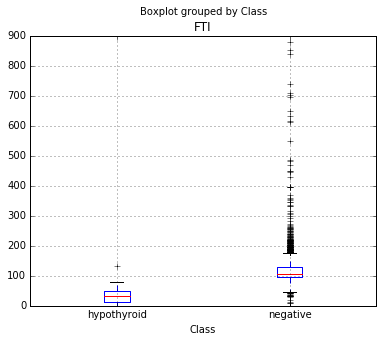

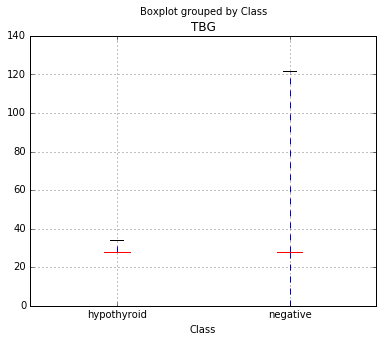

In [40]:
for feature in imputed_data_median._get_numeric_data():
    imputed_data_median.boxplot(column=feature, by='Class', figsize=(6,5))

So for this dataset, the plots with data imputed using the mean method looks pretty much the same as using the median method.  The biggest change that I noticed was in the boxplots for the TBG feature.  The Imputed data sets look different from the original data set. In the original that graph was not as smooth and had a lot more outliers.

#### 3. Sampling
Use simple random sampling without replacement to generate a subsampled dataset with an equal number of majority class and minority class instances. How many majority and minority class instances are there now? Use box plots to assess how representative the subsampled majority class instances are of the majority class. *(3 points)*

     Age Sex On Thyroxine Query on Thyroxine On Antithyroid Medication  \
300   57   M            f                  f                         f   
55    41   F            f                  f                         f   

    Thyroid Surgery Query Hypothyroid Query Hyperthyroid Pregnant Sick  \
300               f                 f                  f        f    f   
55                f                 f                  f        f    f   

        ...        T3 TT4 Measured TT4 T4U Measured   T4U FTI Measured  FTI  \
300     ...       1.6            y  93            y  0.78            y  120   
55      ...       NaN            y  44            y  0.90            y   49   

    TBG Measured  TBG        Class  
300            n  NaN     negative  
55             n  NaN  hypothyroid  

[2 rows x 26 columns]


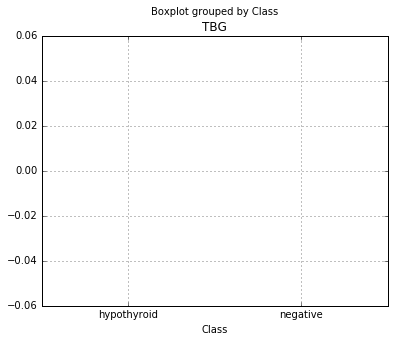

In [72]:
data = pd.read_csv(fileURL)

data_negative = data.loc[data['Class'] == 'negative']
data_hypothyroid = data.loc[data['Class']== 'hypothyroid']


sample_negative = data_negative.sample(n=1, replace=False, axis=0)
sample_hypothyroid = data_hypothyroid.sample(n=1, replace=False, axis=0)



sample = pd.concat([sample_negative, sample_hypothyroid])
print sample.head()
sample.boxplot(column='TBG', by='Class', figsize=(6,5))
#for feature in sample._get_numeric_data():
#    sample.boxplot(column=feature, by='Class', figsize=(6,5))



I sampled 30 each from the majority (hypothyroid) and the minority (negative) classes.  The boxplots that result from this small of a sample, do not show as much information as from the original data set.  They have much fewer data points, and for some features show very little information.  For example, with the TBG feature you see no information for the hypothyroid class, and only the median is visible for the negative class, this is because that feature had so many NaN values in the original data set, that a large number of the sampled records ended up have NaN values for this feature. 

#### Extra Credit. PCA
Use principal component analysis (PCA) to reduce the dataset to 2 features (dimensions). Visualize the results. What do you observe? *(2 points)*

In [42]:
# Insert code here.

Add comments here.